In [21]:
import cv2
import numpy as np
import imutils
import os
import shutil
from matplotlib import pyplot as plt
from IPython.display import Image 
from PIL import Image               # to load images

In [15]:
cropped_dir_path = os.path.dirname(os.path.realpath("__file__")) + "/output/seg"
phase1_path = os.path.join(cropped_dir_path,"phase1")
phase2_path = os.path.join(cropped_dir_path,"phase2")
file_ready_for_lines_detection = os.path.join(os.path.dirname(os.path.realpath("__file__")),"phase0-output/processed/88d1c53a-4933-55ab-9223-3d14f4d87a07-e6722290_pg-0_sg-0_M.jpg")
sample_images_path = os.path.join(os.path.dirname(os.path.realpath("__file__")),"../sample-images")
original_image_path = os.path.join(sample_images_path, "acord-25-form-fillable-free.jpg")

In [59]:
pil_im = Image.open(file_ready_for_lines_detection)

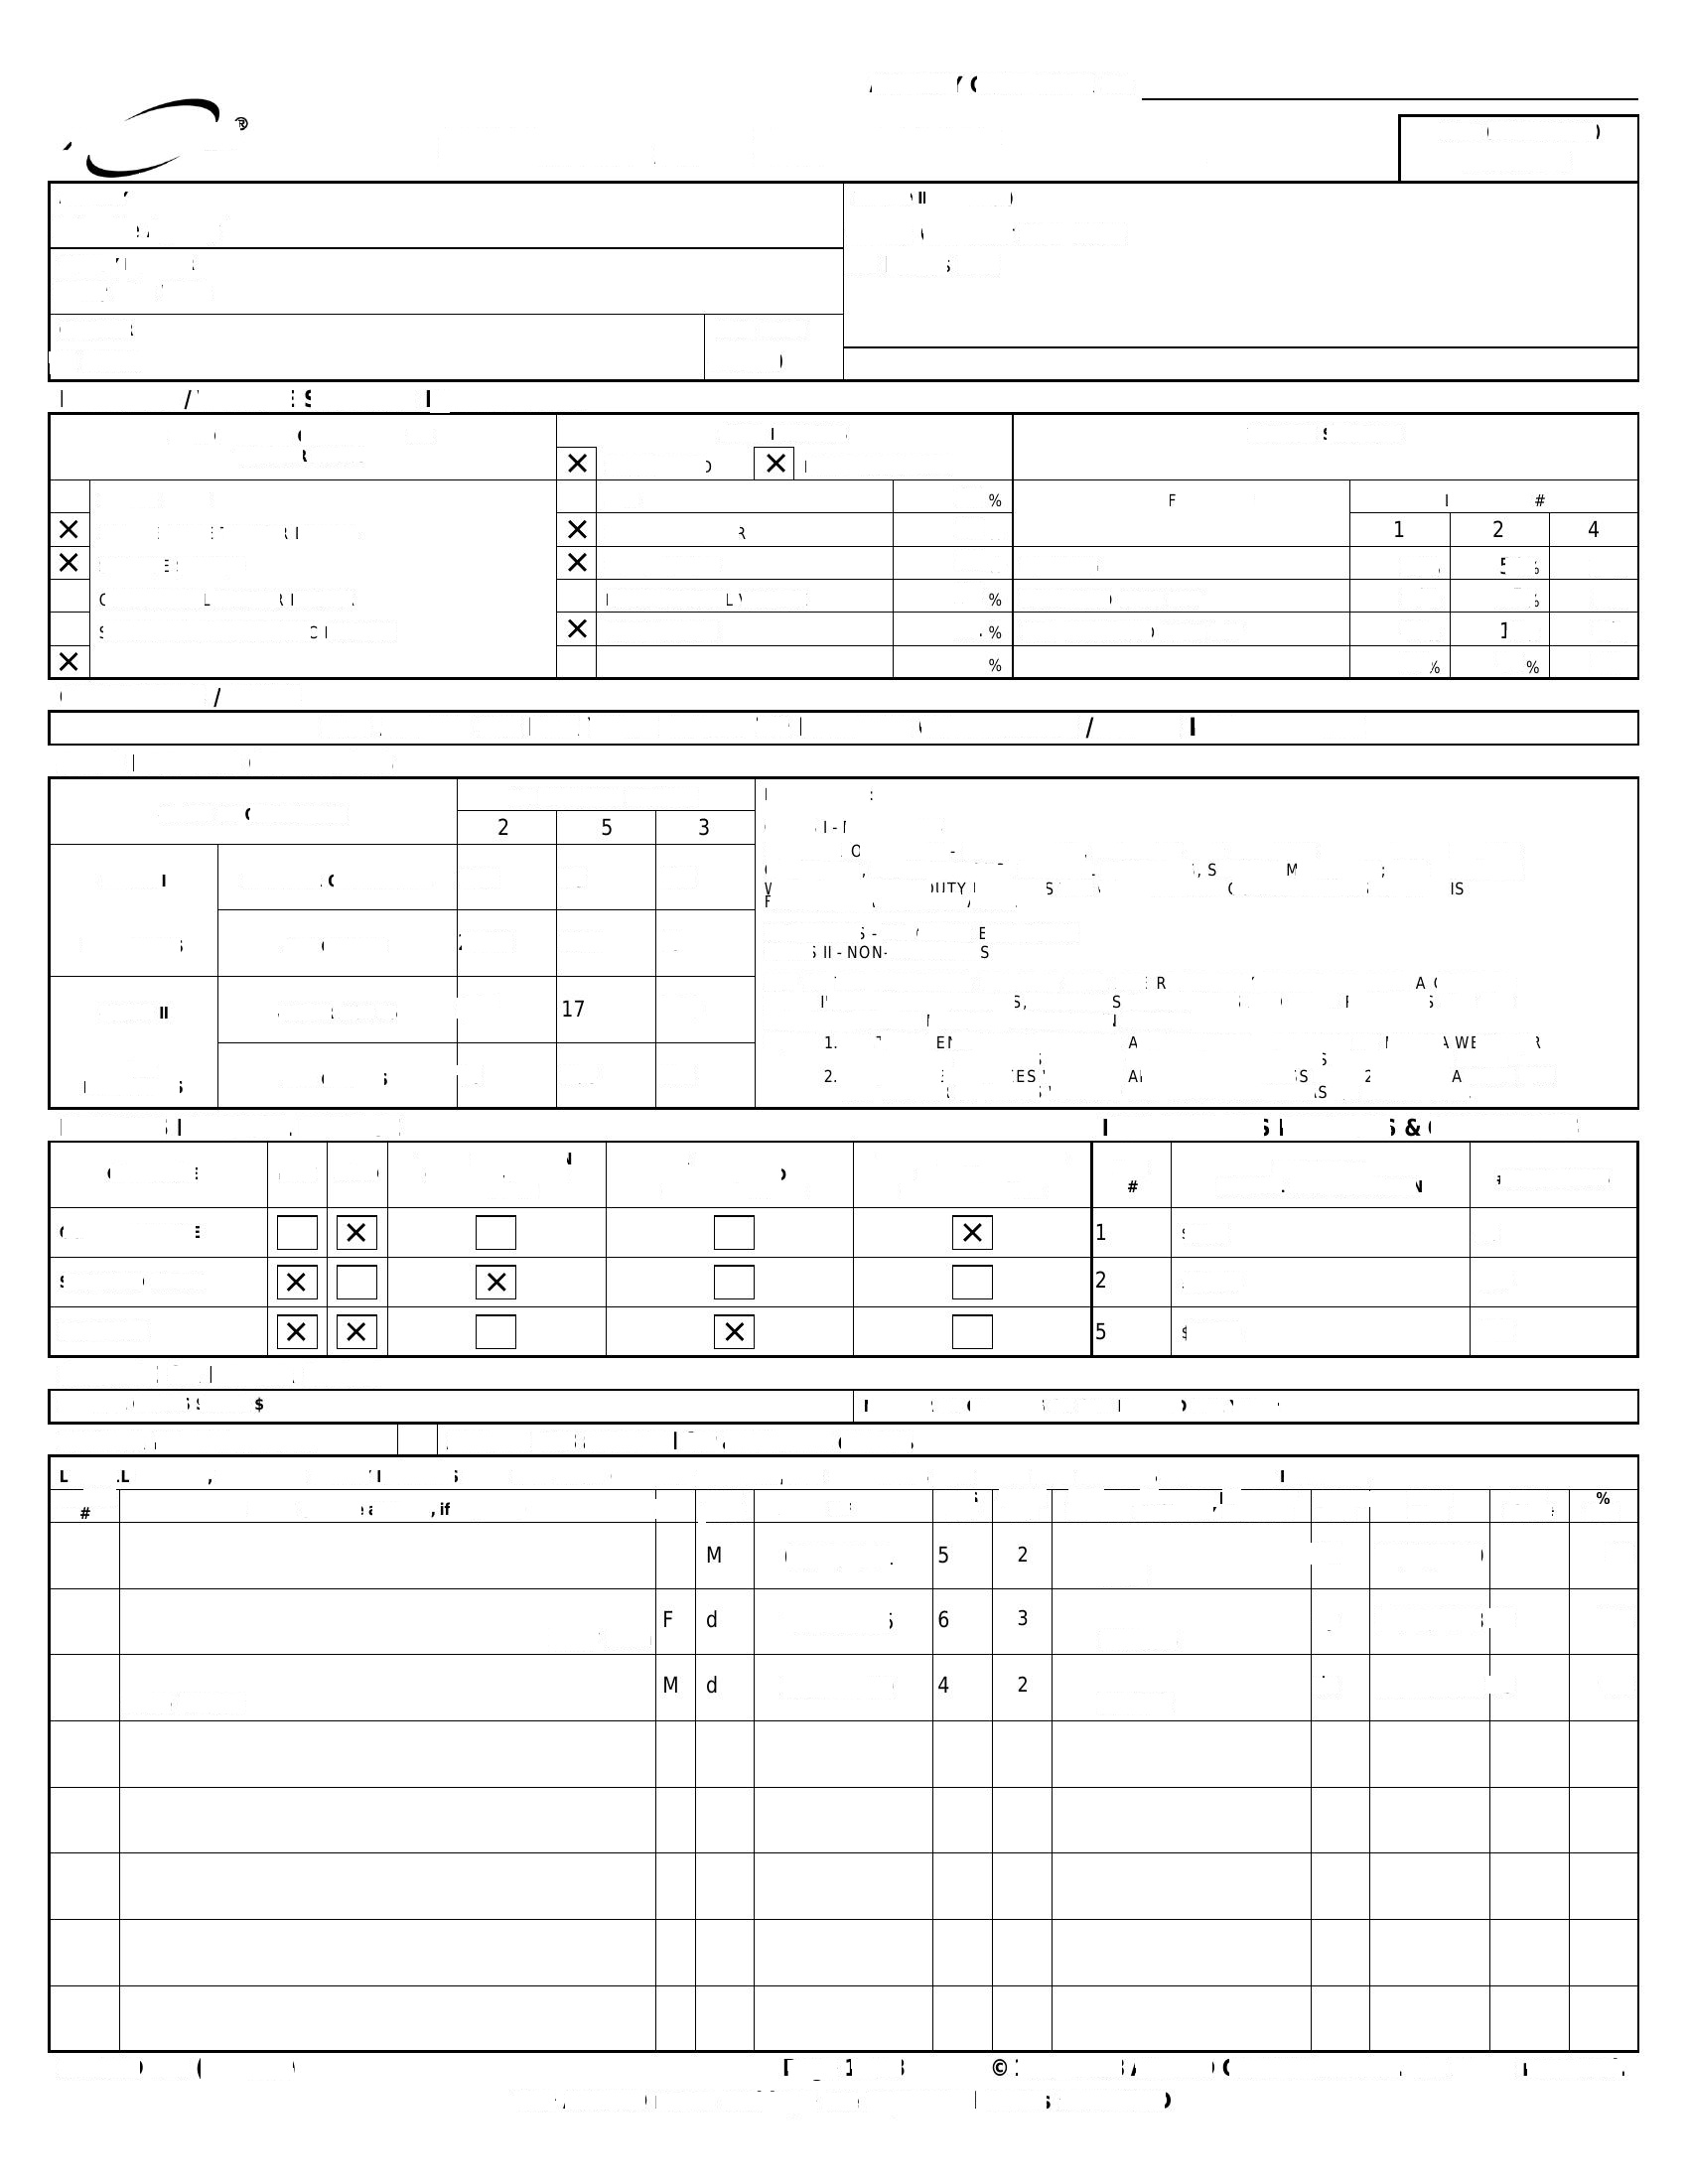

In [40]:
img = cv2.imread(file_ready_for_lines_detection)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(img))

In [48]:
(thresh, img_bin) = cv2.threshold(gray, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
img_bin = 255-img_bin 

In [72]:
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
print(hori_kernel)
print(verticle_kernel)
print(kernel)

[[1 1]]
[[1]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [92]:
#
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=5)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=25)
#cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=25)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=35)
#cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)

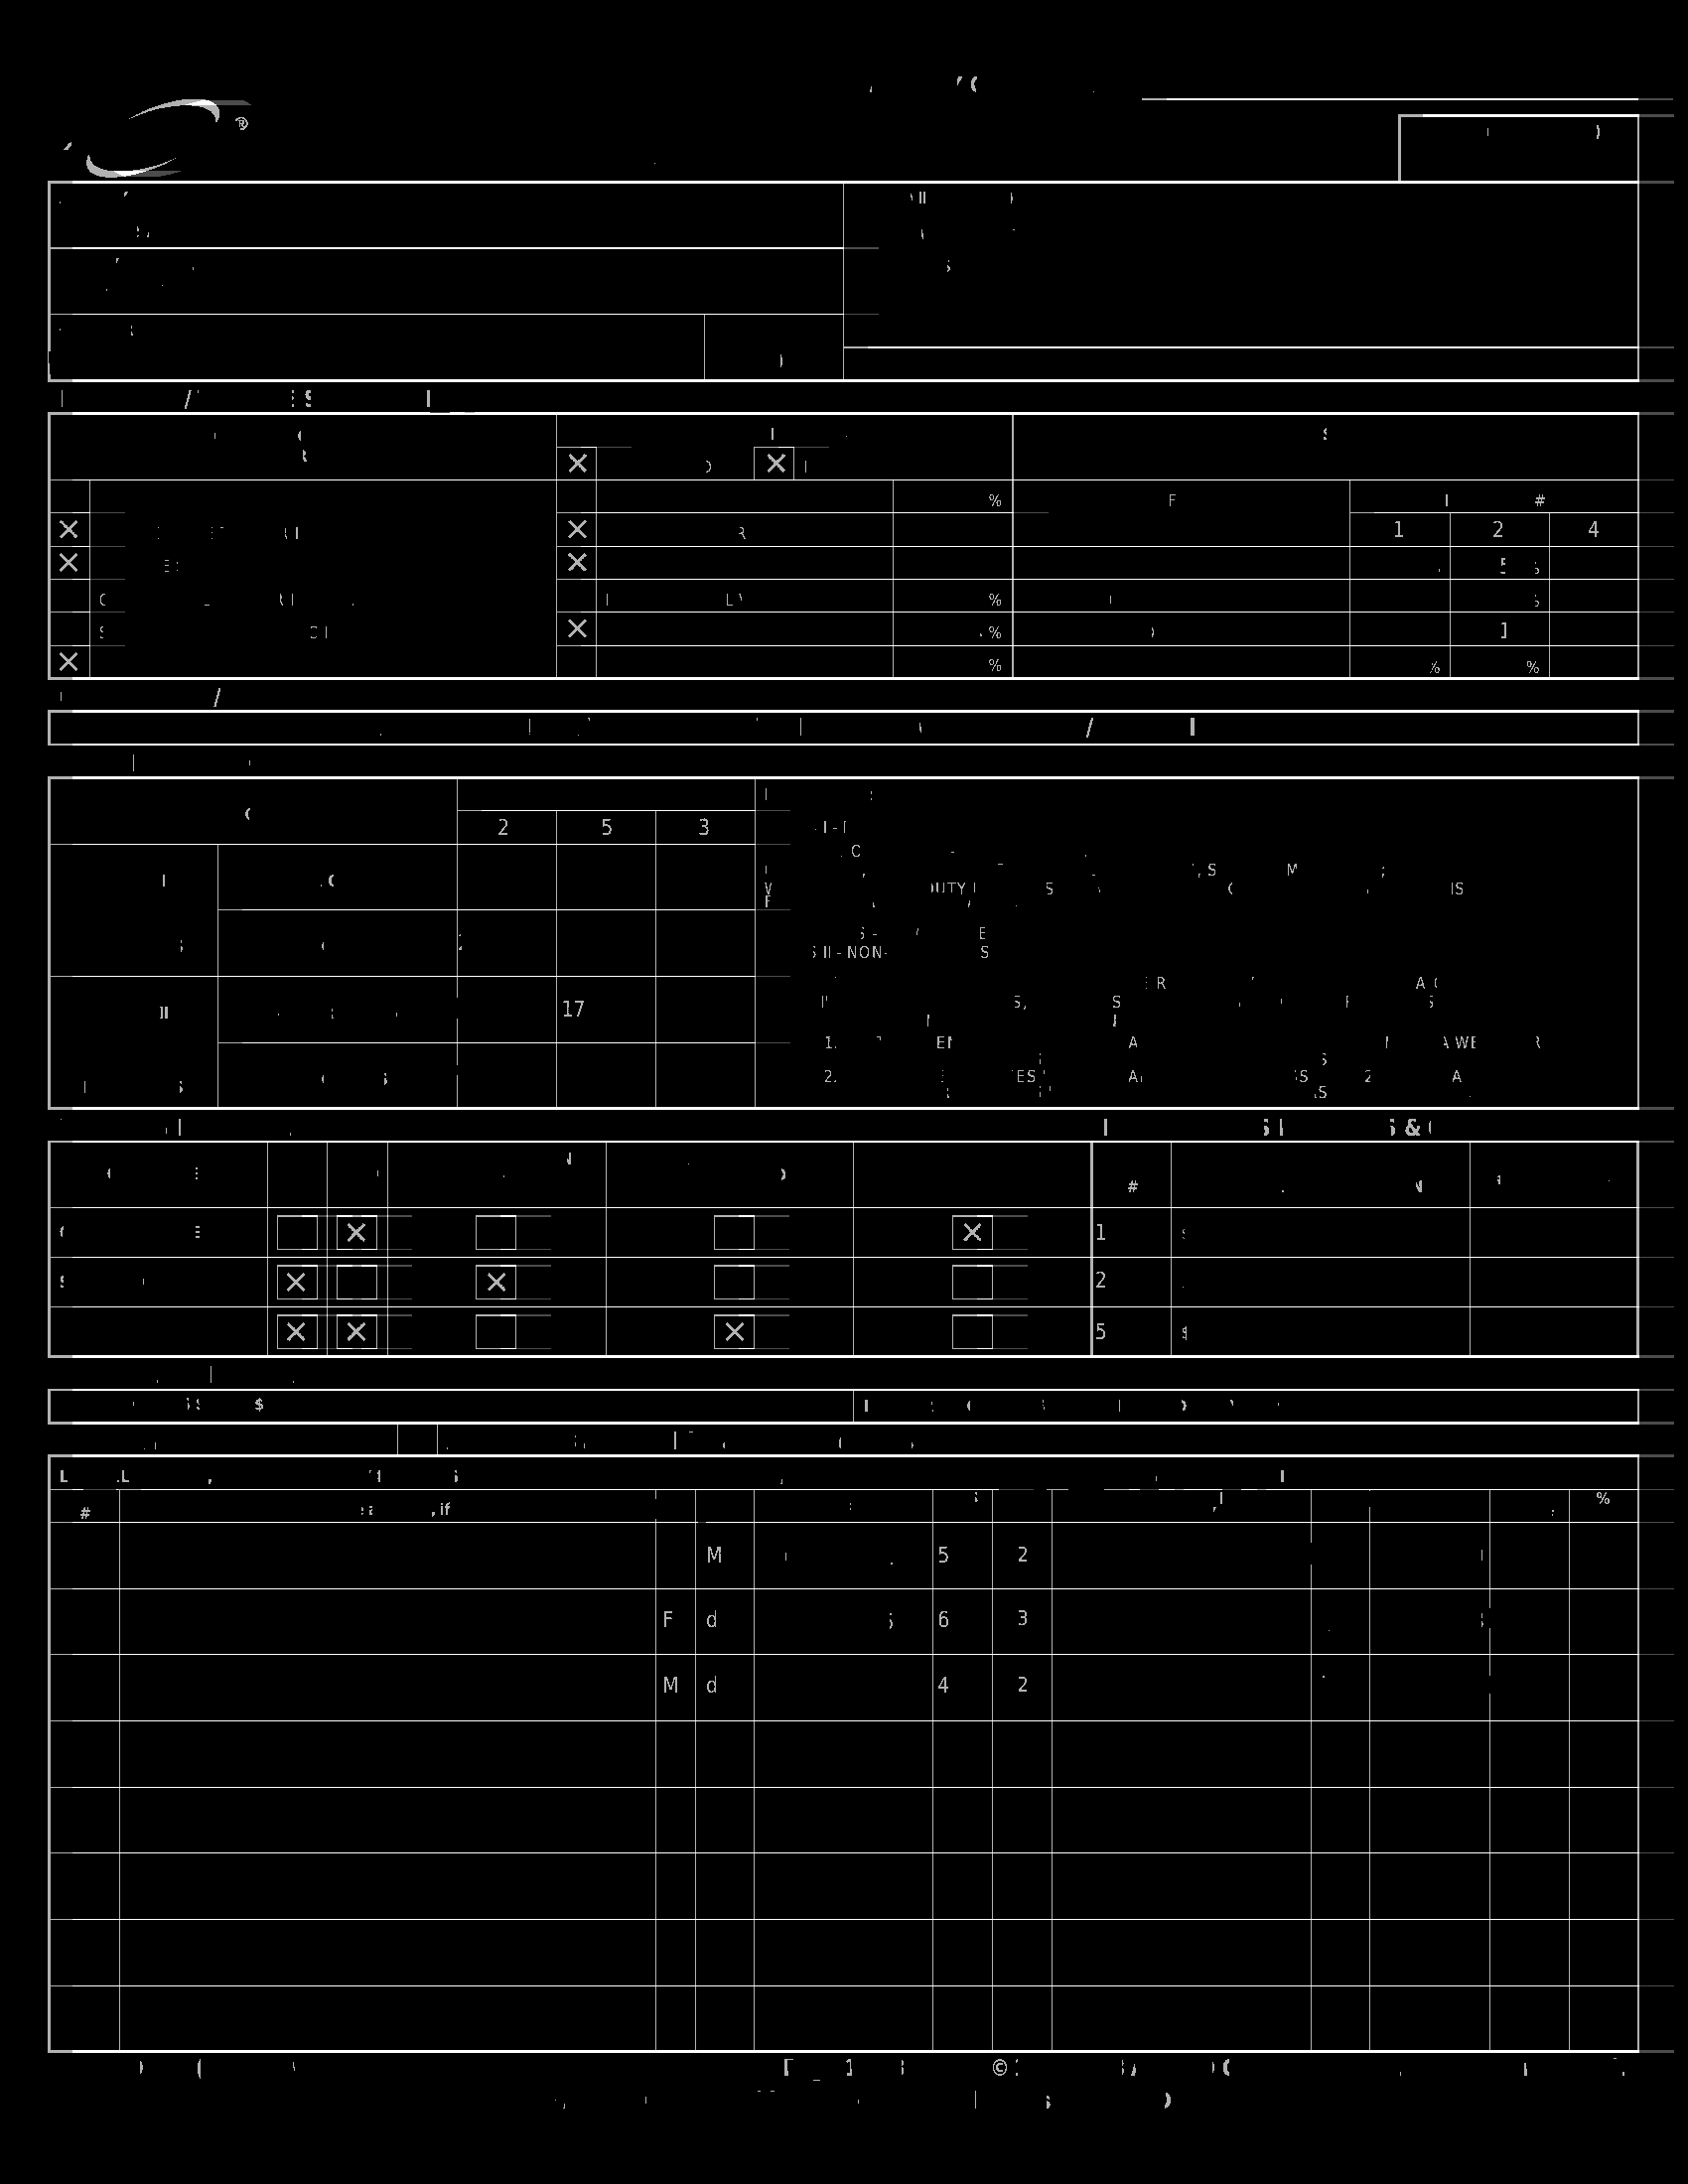

In [93]:
#
#
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.7
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
# img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=1)
display(Image.fromarray(img_final_bin))


In [94]:
(ret, thresh) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
 # Find contours for image, which will detect all the boxes
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

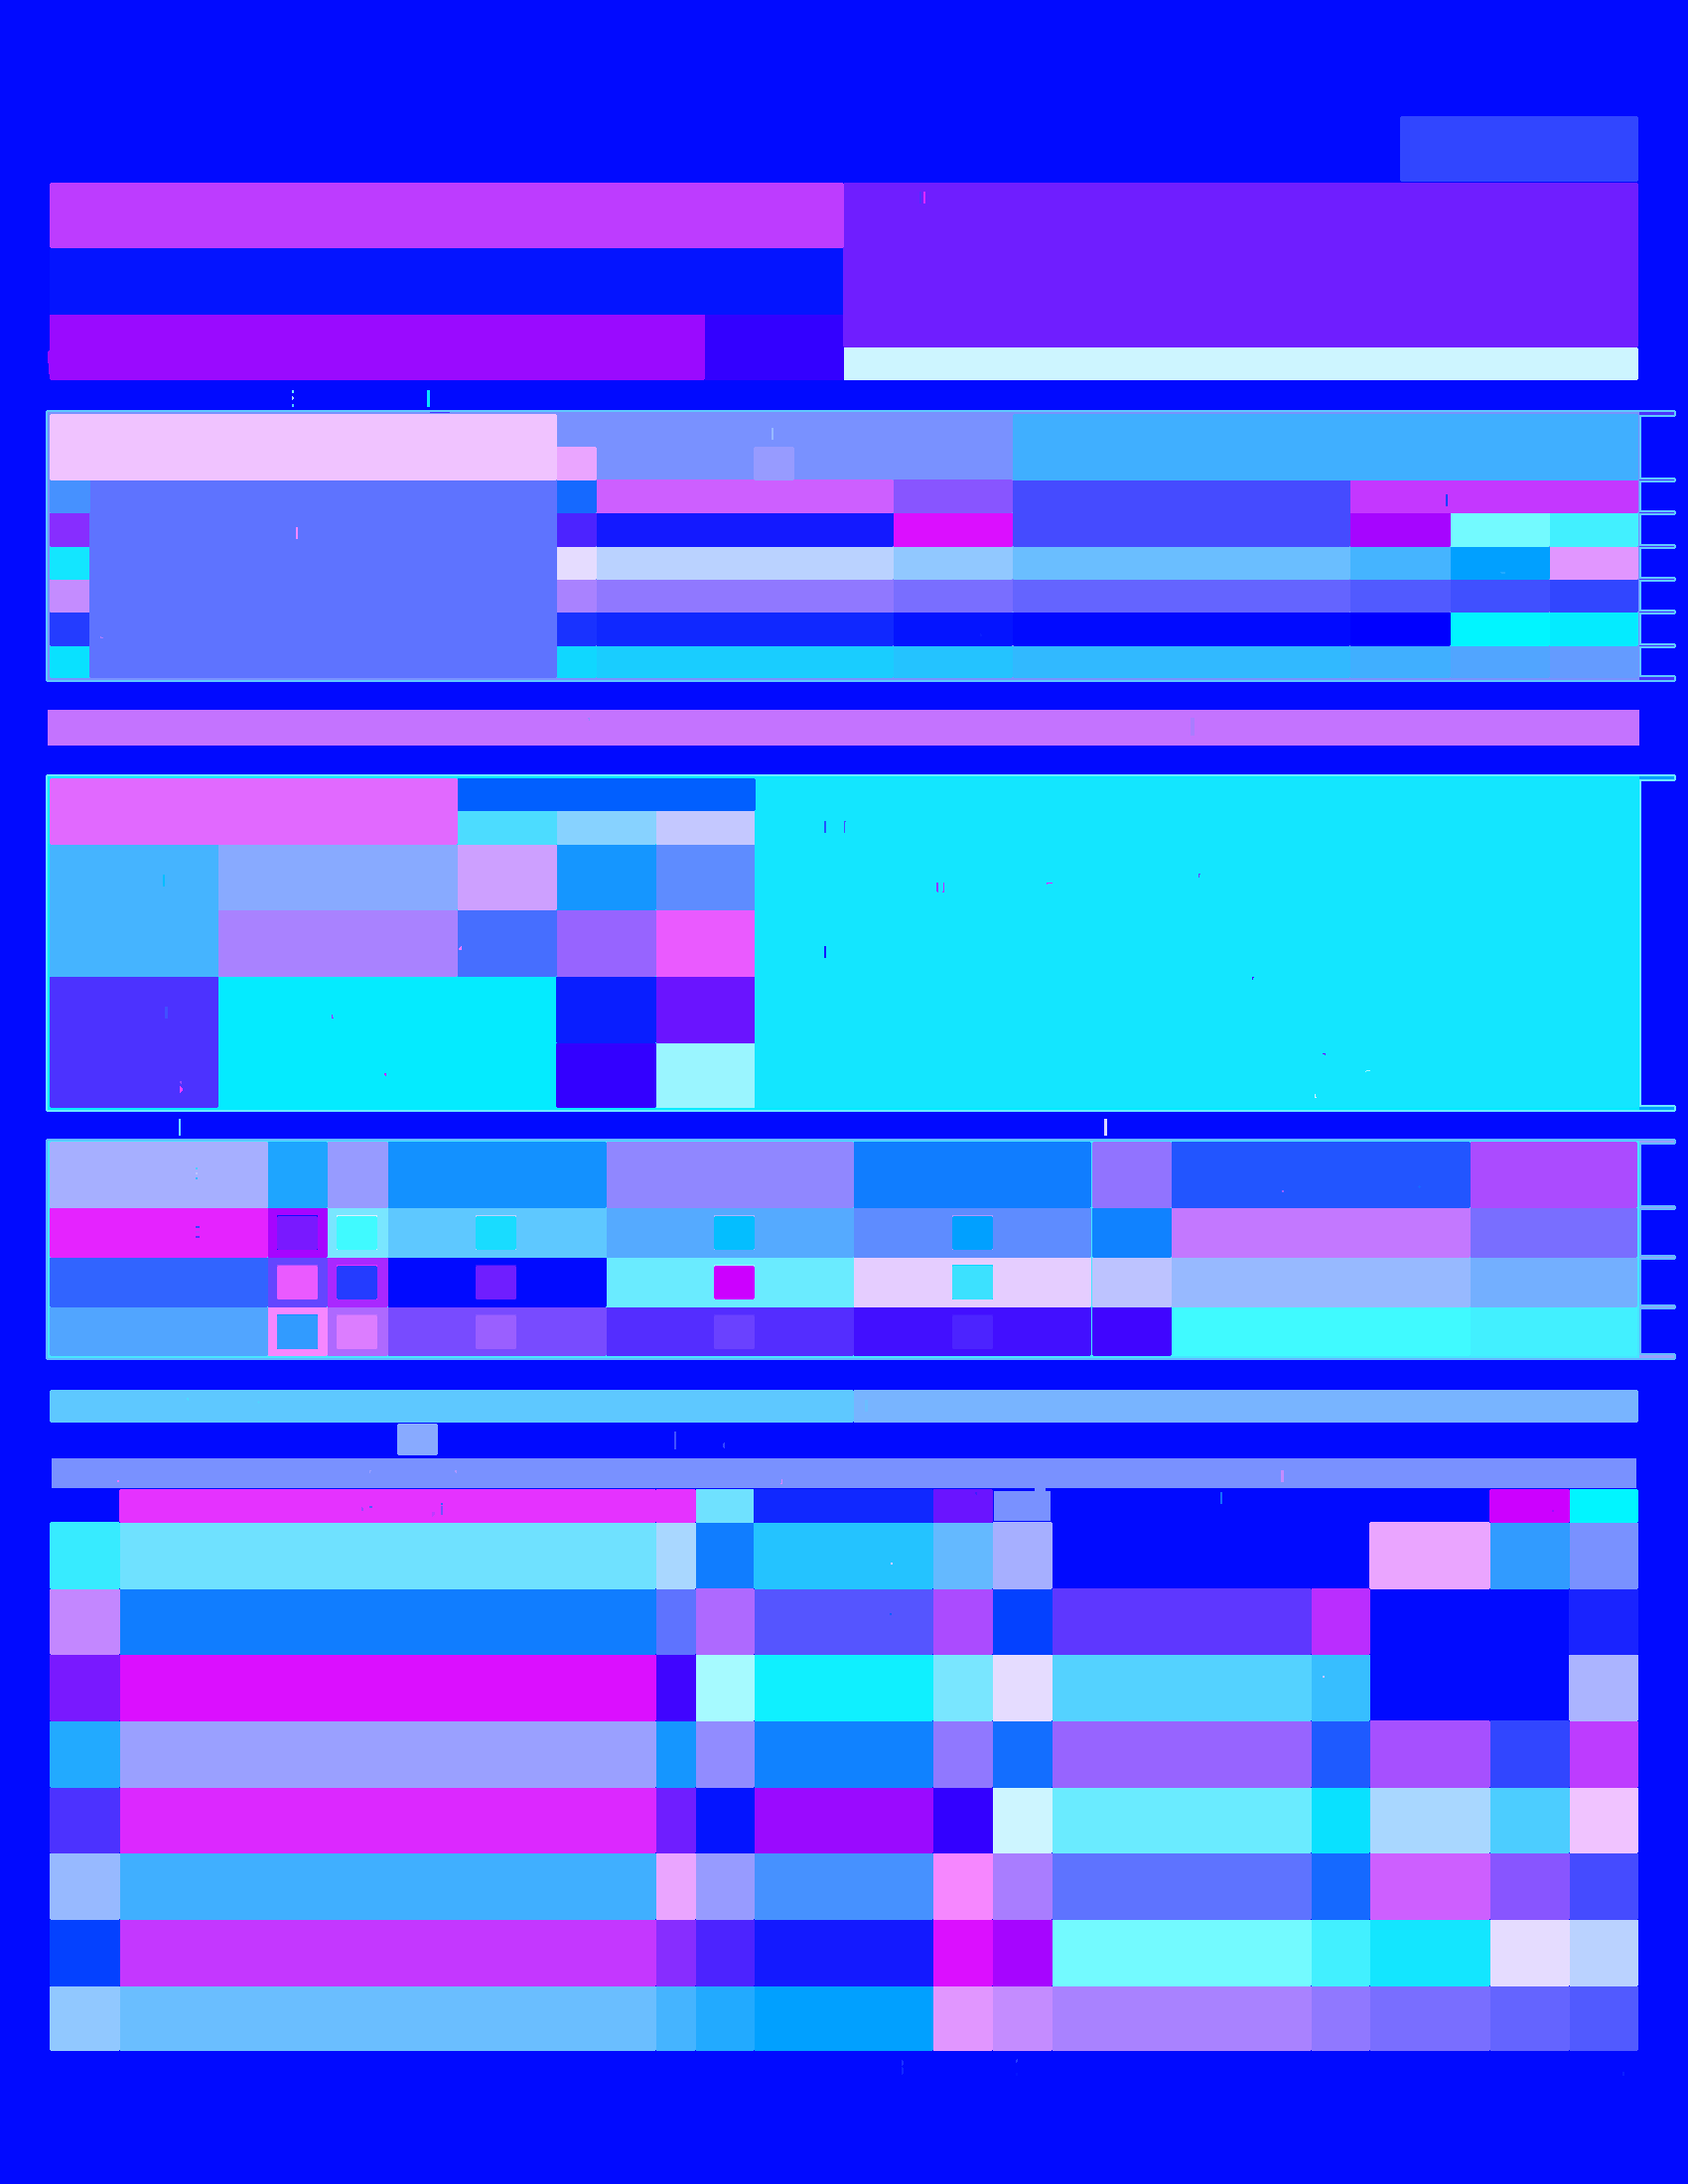

In [95]:

id= 0 
for cnt in contours:
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)    
    if len(approx)==4:
        id+=1
        cv2.drawContours(img,[cnt],0,((id*id)%255,(id*10)%255,255),-1)
 
display(Image.fromarray(img))